# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [28]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

%matplotlib inline

### Step 2: Read in your data set 

In [29]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [30]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [31]:
#Checking for missing data. the null observations
# What would be a easy way to print nulls???
df_raw[pd.isnull(df_raw).any(axis=1)]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


Answer: We are missing dat on 3 entries. So we have 397 observations in total we can use.

#### Question 2. Create a summary table

In [32]:
#function

In [33]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because it has a wider range of possible values.

#### Question 4. Drop data points with missing data


In [34]:
df_raw = df_raw.dropna()
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Run the isnull function again.

In [35]:
#df_raw.count()
df_raw[pd.isnull(df_raw).any(axis=1)]

,admit,gre,gpa,prestige


In [36]:
df_raw.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 6. Create box plots for GRE and GPA

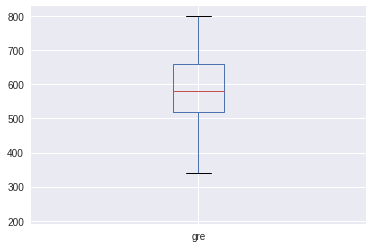

In [37]:
df_raw['gre'].plot(kind="box") 

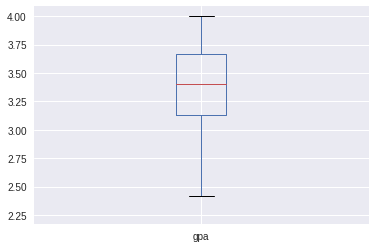

In [38]:
#boxplot 2 
df_raw['gpa'].plot(kind="box") 

#### Question 7. What do this plots show?

Answer: Both GRE and GPA have some outliers. So let's plot again to have a better vision. 

#### Question 8. Describe each distribution 

(array([  1.,   3.,  16.,  28.,  50.,  75.,  81.,  64.,  44.,  35.]),
 array([ 220.,  278.,  336.,  394.,  452.,  510.,  568.,  626.,  684.,
         742.,  800.]),
 <a list of 10 Patch objects>)

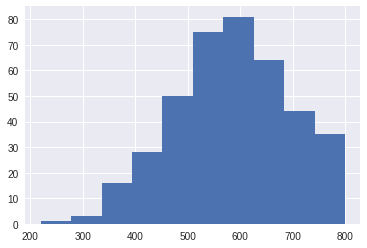

In [39]:
plt.hist(df_raw['gre'])


So GRE seems like a normally distributed variable. Above we have a different visualization that show it compared with admit

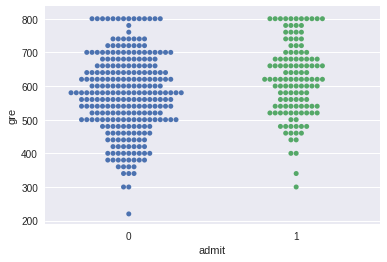

In [40]:
# plot the distribution of each variable 
#df_raw.plot(kind='scatter', x='gre', y='admit')
sns.swarmplot(y="gre", x="admit", data=df_raw, split=True);

(array([  3.,   4.,  16.,  32.,  42.,  57.,  76.,  65.,  39.,  63.]),
 array([ 2.26 ,  2.434,  2.608,  2.782,  2.956,  3.13 ,  3.304,  3.478,
         3.652,  3.826,  4.   ]),
 <a list of 10 Patch objects>)

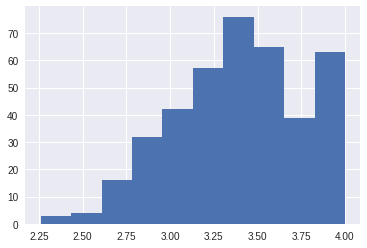

In [41]:
plt.hist(df_raw['gpa'])

Also have some normal characteristics with a little more occurrences in the max value.

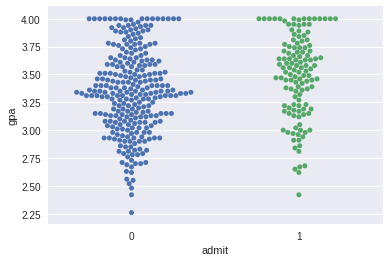

In [42]:
sns.swarmplot(y="gpa", x="admit", data=df_raw, split=True);

(array([  61.,    0.,    0.,  148.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

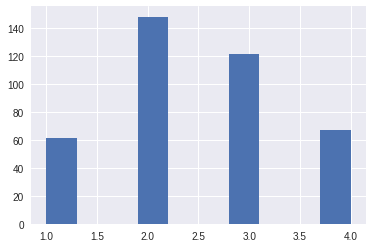

In [43]:
plt.hist(df_raw['prestige'])

Prestige also have some normal distribution characterists.

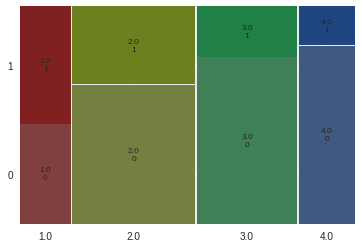

In [44]:
#sns.swarmplot(y="admit", x="prestige", data=df_raw, split=True);
order = df_raw.sort_values(by='prestige')
from statsmodels.graphics.mosaicplot import mosaic
mosaic(order, ['prestige', 'admit']);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, the variables look normally distributed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

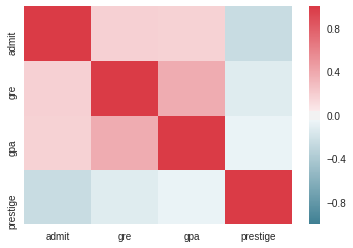

In [45]:
# create a correlation matrix for the data
import seaborn as sns
sns.heatmap(df_raw.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))  #cmap sets the color map to use

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24c16c0690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f24c11f4f10>]], dtype=object)

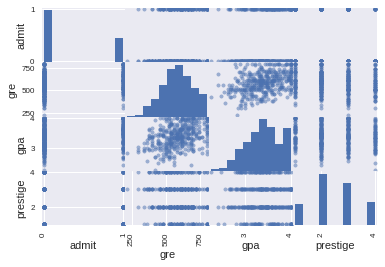

In [46]:
pd.scatter_matrix(df_raw)

In [47]:
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: That the variables are not very correlated to each other. The max value is 0.38

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: As the variable seems not highly correlated and normally distributed. I would use a ordinary least squares (OLS) regression to build a model and find the association between the variables.

#### Question 14. What is your hypothesis? 

Answer: My H1 is that this variables are associated to the chances of being admitted. So we will prove that H0 (not related) is false.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data